In [11]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from SED_Model import lrt_model

In [12]:
#This function uses the AGN SED from Assef et al. (2010) and codes to calculate the M_i as a function of redshift for a fixed i-band observed magnitude. It also adds a correction to exactly match the M_i reported for the object at its spec redshift to account for the fact that other templates were used. 
def get_Mi_z(m_i, zs, Mi_catalog=None, z_catalog=None):
    gal = lrt_model()
    gal.comp = np.zeros(4)
    gal.comp[0] = 1.0
    gal.ebv = 0.
    gal.igm = 1.0
    norm = 0
    if Mi_catalog is not None:   
        gal.zspec = z_catalog
        gal.get_model_fluxes()
        gal.comp[0] *= 3631.*10.**(-0.4*m_i)/gal.jymod[0]
        norm = gal.abs_mag[0] - Mi_catalog

    Mi_z = np.zeros(zs.shape)
    for k,z in enumerate(zs):
        gal.zspec = z
        gal.get_model_fluxes()
        gal.comp[0] *= 3631.*10.**(-0.4*m_i)/gal.jymod[0]
        Mi_z[k] = gal.abs_mag[0] - norm
    return Mi_z

In [13]:
lam_obs = 7500.*u.AA
m_i = 18
zs = np.arange(0.3, 5.0, 0.05)
#zs = 10.**(np.arange(np.log(0.3), np.log10(5), 0.01))
Mis = get_Mi_z(m_i, zs)

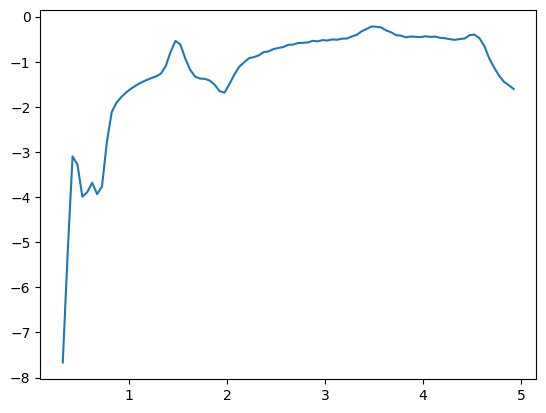

In [14]:
z_mid = 0.5*(zs[1:]+zs[:-1])
dMi_dz = (Mis[1:]-Mis[:-1])/(zs[1:]-zs[:-1]) 
Mi_use = get_Mi_z(m_i, z_mid)
plt.plot(z_mid, dMi_dz)

In [15]:
A = {"tau": 2.2 , "SFinf":-0.618}
B = {"tau": 0.17, "SFinf":-0.479}
C = {"tau":-0.01, "SFinf":0.09}

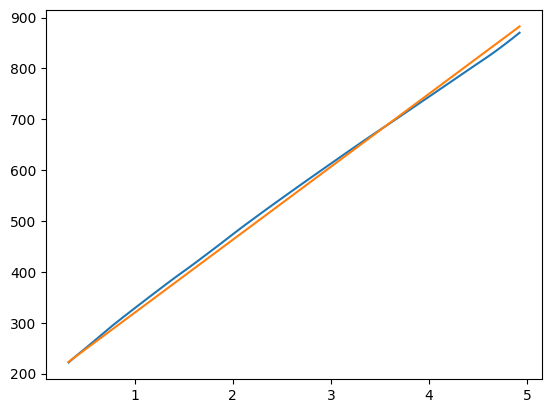

In [22]:
par = "tau"
logx = A[par]+B[par]*np.log10(lam_obs/(1+z_mid)/(4000*u.AA))+C[par]*(Mi_use+23)
x = 10.**logx
x *= (1+z_mid)
plt.plot(z_mid, x)
x_model = (750.-320.)/(4.-1.) * (z_mid - 1) + 320.
plt.plot(z_mid, x_model)

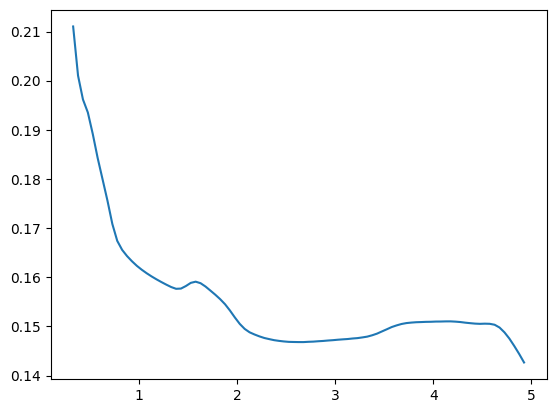

In [17]:
par = "SFinf"
logx = A[par]+B[par]*np.log10(lam_obs/(1+z_mid)/(4000*u.AA))+C[par]*(Mi_use+23)
x = 10.**logx
plt.plot(z_mid, x)

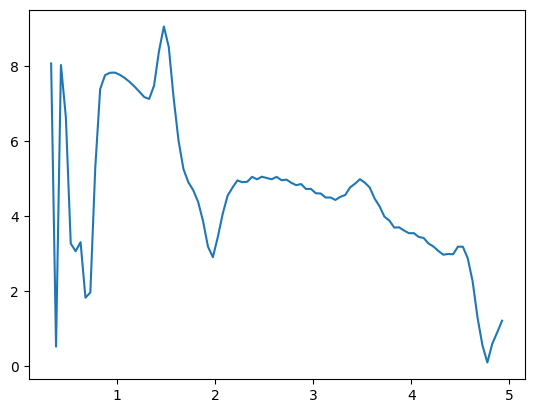

In [18]:
par = "tau"
logx = A[par]+B[par]*np.log10(lam_obs/(1+zs)/(4000*u.AA))+C[par]*(Mis+23)
x = 10.**logx
dx_dz = (x[1:]-x[:-1])/(zs[1:]-zs[:-1])
plt.plot(z_mid, np.abs(dx_dz))

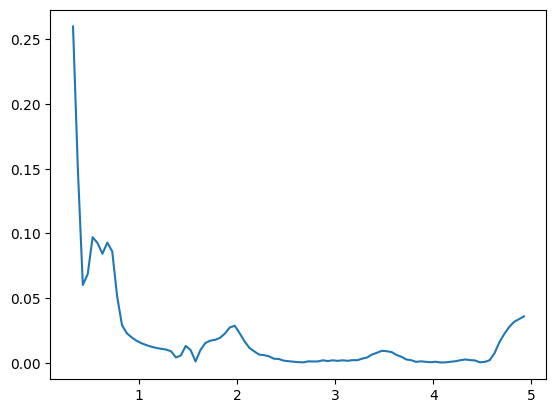

In [19]:
par = "SFinf"
logx = A[par]+B[par]*np.log10(lam_obs/(1+zs)/(4000*u.AA))+C[par]*(Mis+23)
x = 10.**logx
dx_dz = (x[1:]-x[:-1])/(zs[1:]-zs[:-1])
plt.plot(z_mid, np.abs(dx_dz))

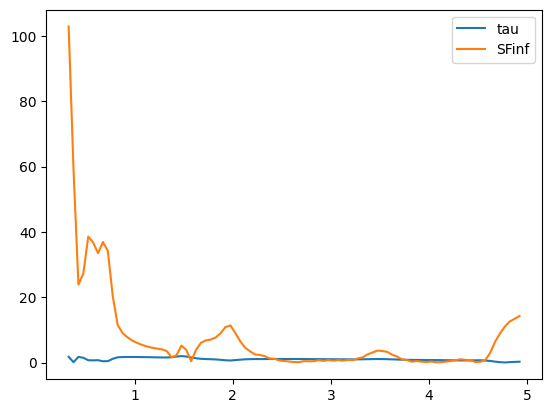

In [20]:
for par in A.keys():
    logx = A[par]+B[par]*np.log10(lam_obs/(1+z_mid)/(4000*u.AA))+C[par]*(Mi_use+23)
    x = 10.**logx
    dx_dz = x * (-B[par]/(1+z_mid) + C[par]*np.log(10.)*dMi_dz)
    plt.plot(z_mid, np.abs(dx_dz/np.median(dx_dz)), label=par)
plt.legend()
plt.show()